In [37]:
import pandas as pd 
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import tensorflow as tf

In [36]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
    --------------------------------------- 5.5/390.2 MB 27.9 MB/s eta 0:00:14
   - -------------------------------------- 10.0/390.2 MB 24.8 MB/s eta 0:00:16
   - -------------------------------------- 14.9/390.2 MB 24.1 MB/s eta 0:00:16
   -- ------------------------------------- 21.2/390.2 MB 25.8 MB/s eta 0:00:15
   -- ------------------------------------- 26.2/390.2 MB 25.2 MB/s eta 0:00:15
   --- ------------------------------------ 30.9/390.2 MB 24.5 MB/s eta 0:00:15
   --- ------------------------------------ 34.6/390.2 MB 23.9 MB/s eta 0:00:15
   ---- ----------------------------------- 39.3/390.2 MB 23.4 MB/s eta 0:00:16
   ---- ----------------------------------- 43.0/390.2 MB 23.0 MB/s eta 0:00:16
   ----- ---------------------------------- 49.0/390.2 MB 23.5 MB/s eta 0:00:15
   ----- ---------------------------------- 54.3/390.2 MB 23.7 MB/s eta 0:00:15
   ------ --------------------------------- 60.6/3

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wayla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
!spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------- ------------------------ 5.0/12.8 MB 27.4 MB/s eta 0:00:01
     --------------------------------- ----- 11.0/12.8 MB 28.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 25.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
articles = pd.read_csv("20241018-235356/CNN_Articels_clean_2/CNN_Articels_clean.csv")
articles["Article text"].iloc[0]

' (CNN)Right now, there\'s a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world\'s largest truck manufacturers -- Navistar in the US and Traton, Volkswagen\'s trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world\'s first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see

In [5]:
 '''
## **‼️Action Item(s):‼️**

- Meet with your pair for 1.5-2 hours working on your given dataset
    - Set up Google Colab
    - Load up the dataset
    - Data cleaning: tokenization, stopword removal, lemmatization, stemming, punctuation, casing
    - Exploratory Data Analysis: Graphs, word frequency, n-grams, word clouds
    - Think about different project scopes/modeling
        - Be more specific about details
    - If time permits: Feature engineering
        - The main topic for next week
'''

'\n## **‼️Action Item(s):‼️**\n\n- Meet with your pair for 1.5-2 hours working on your given dataset\n   - Set up Google Colab\n   - Load up the dataset\n   - Data cleaning: tokenization, stopword removal, lemmatization, stemming, punctuation, casing\n   - Exploratory Data Analysis: Graphs, word frequency, n-grams, word clouds\n   - Think about different project scopes/modeling\n       - Be more specific about details\n   - If time permits: Feature engineering\n       - The main topic for next week\n'

In [7]:
articles.head(20)

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,1,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,2,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,3,Kathryn Vasel,2022-03-18 14:37:21,business,success,https://www.cnn.com/2022/03/18/success/pandemi...,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"success, Two years later, remote work has chan...","Two years later, remote work has changed milli...",The pandemic thrust the working world into a n...
4,4,"Paul R. La Monica, CNN Business",2022-03-19 11:41:08,business,investing,https://www.cnn.com/2022/03/19/investing/march...,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,"investing, Why March is so volatile for stocks...",Why March is so volatile for stocks,New York (CNN Business)March Madness isn't jus...
5,5,"Chris Isidore, CNN Business",2022-03-20 11:36:43,business,investing,https://www.cnn.com/2022/03/20/investing/stock...,Stocks week ahead: Big Oil rakes in billions a...,"As crude prices surge, oil companies are rakin...","investing, Stocks week ahead: Big Oil rakes in...",Big Oil rakes in billions as prices soar. Lawm...,A version of this story first appeared in CNN ...
6,6,"Matt Egan, CNN Business",2022-03-18 14:26:26,business,energy,https://www.cnn.com/2022/03/18/energy/oil-russ...,Oil 'emergency': Work from home and drive slow...,Governments around the world must consider dra...,"energy, Oil 'emergency': Work from home and dr...",Oil 'emergency': Work from home and drive slow...,New York (CNN Business)Governments around the ...
7,7,"As told to by Chris Wellisz, International Mon...",2022-03-20 12:57:36,business,perspectives,https://www.cnn.com/2022/03/20/perspectives/im...,Opinion: Technology is transforming the nature...,The convenience of digital payments to both co...,"perspectives, Opinion: Technology is transform...",Technology is transforming the nature of money...,This interview has been edited from its origin...
8,8,"Paul R. La Monica, CNN Business",2022-03-18 17:14:11,business,investing,https://www.cnn.com/2022/03/18/investing/smart...,Inflation is everywhere. Except your cell phon...,"Inflation is everywhere: grocery stores, gas s...","investing, Inflation is everywhere. Except you...",Inflation is everywhere. Except your cell phon...,New York (CNN Business)Inflation is everywhere...
9,9,"Jordan Valinsky, CNN Business",2022-03-18 11:32:30,business,business-food,https://www.cnn.com/2022/03/18/business-food/b...,Burger King partner 'refuses' to close 800 Rus...,Burger King is trying to suspend its operation...,"business-food, Burger King partner 'refuses' t...",Burger King franchise 'refuses' to close 800 R...,New York (CNN Business)Burger King is trying t...


In [8]:
visualizations = articles.copy() 
visualizations['Year'] = visualizations['Date published'].apply(lambda x: int(x[:4]))

plt.show()

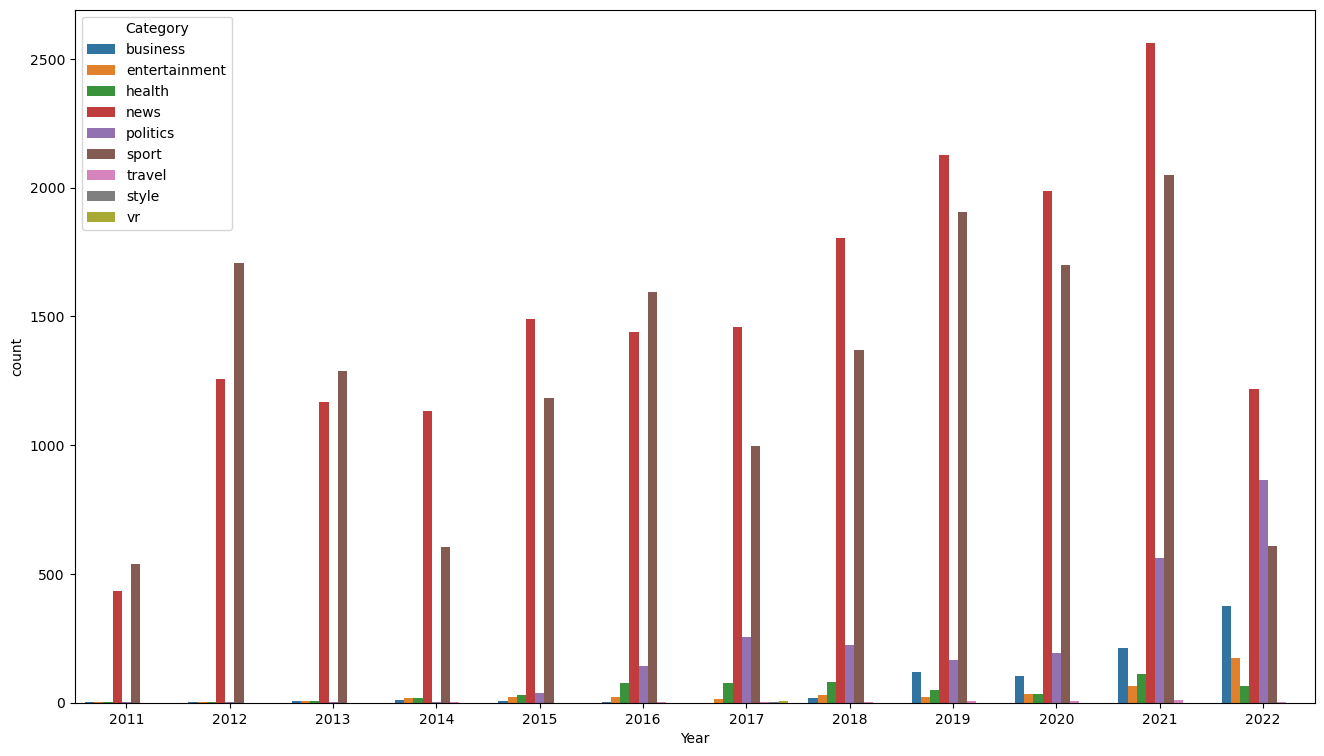

In [9]:
plt.figure(figsize=(16, 9))
categories = visualizations[['Year', 'Category']].groupby(['Year', 'Category']).value_counts().to_frame()
#sections = visualizations.groupby(['Section']).count()[['Section', 'Index']]
sns.barplot(x = 'Year',
            y = 'count',
            hue = 'Category',
            data = categories)
plt.show()

In [10]:
categories

count
Year Category            
2011 business           1
     entertainment      1
     health             1
     news             433
     politics           1
...                   ...
2022 health            63
     news            1219
     politics         865
     sport            608
     travel             4

[81 rows x 1 columns]

In [11]:
text = "This is a sample sentence demonstrating stopword removal."
doc = nlp(text)
filtered_tokens = [token.text for token in doc if not token.is_stop]
filtered_text = " ".join(filtered_tokens)

In [12]:
filtered_text

'sample sentence demonstrating stopword removal .'

In [13]:
list[doc]

list[This is a sample sentence demonstrating stopword removal.]

In [14]:
def stopword_removal(text) :
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.is_stop]
    filtered_text = " ".join(filtered_tokens)
    return filtered_text

def lower_caser(dataframe) :
    for i in dataframe.columns :
        dataframe[i] = dataframe[i].str.lower()
    return dataframe

In [15]:
articles_text = articles[["Headline", "Description","Second headline"]]

In [15]:
articles_text = lower_caser(articles_text)
articles_text["Headline_no_stopwords"] = articles_text["Headline"].map(stopword_removal)
articles_text["Description_no_stopwords"] = articles_text["Description"].map(stopword_removal)
articles_text["Second_headline_no_stopwords"] = articles_text["Second headline"].map(stopword_removal)

/tmp/ipykernel_192/3595976467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[i] = dataframe[i].str.lower()


KeyboardInterrupt: 

In [1]:
def clean(text) :
    doc = nlp(text)
    filtered_tokens = [str(token.lemma_) for token in doc if not token.is_stop]
    filtered_text = " ".join(filtered_tokens)
    return filtered_text

def token_tensorize(tokenized_object) : 
    tokenized_object = nlp(tokenized_object)
    token_list = [token.text for token in tokenized_object]
    return np.array(token_list)



articles_text["Headline_clean"] = articles_text["Headline"].map(clean)
articles_text["Description_clean"] = articles_text["Description"].map(clean)
articles_text["Second_headline_clean"] = articles_text["Second headline"].map(clean)

NameError: name 'articles_text' is not defined

In [ ]:
articles_contents = articles_text["Article text"].map(clean)

In [16]:
def word_array(column) :
    doc = nlp(text)
    filtered_tokens = [str(token.lemma) for token in doc if not token.is_stop]
    return filtered_text   

def calculate_proportions(ser) :
    arrays = word_array(ser)
    counts = arrays.apply(lambda x: \
            [np.unique(x, return_counts=True)[0], np.unique(x, return_counts=True)[1]/np.sum(np.unique(x, return_counts=True)[1])])

In [18]:
def joinDescription(category, year=None):
    if year:
        only_category = articles_text[(articles_text['Category'] == category) & (articles_text['Year'] == year)]
    else:
        only_category = articles_text[articles_text['Category'] == category]
    combined_description = ' '.join(only_category['Description'])
    return combined_description

In [19]:
articles_text['Category'] = articles['Category']
articles_text['Year'] = visualizations['Year']
articles_text

C:\Users\wayla\AppData\Local\Temp\ipykernel_24756\3753216103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_text['Category'] = articles['Category']
C:\Users\wayla\AppData\Local\Temp\ipykernel_24756\3753216103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_text['Year'] = visualizations['Year']


,Headline,Description,Second headline,Category,Year
0,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"There's a shortage of truckers, but TuSimple t...",news,2021
1,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,A robotic 'Ironhand' could protect factory wor...,news,2021
2,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...",This swarm of robots gets smarter the more it ...,news,2021
3,"Two years later, remote work has changed milli...",Here's a look at how the pandemic reshaped peo...,"Two years later, remote work has changed milli...",business,2022
4,Why March is so volatile for stocks - CNN,March Madness isn't just for college basketbal...,Why March is so volatile for stocks,business,2022
...,...,...,...,...,...
37944,Russian President Vladimir Putin is being stri...,Russian President Vladimir Putin has been stri...,Vladimir Putin is being stripped of his honora...,sport,2022
37945,"On NATO's doorstep, a former tourist hotspot i...",A long line of men snakes out of an unassuming...,"On NATO's doorstep, a former tourist hotspot i...",news,2022
37946,MLB is postponing Opening Day after owners and...,Major League Baseball (MLB) is postponing its ...,MLB is postponing Opening Day after owners and...,sport,2022
37947,Mikhail Gorbachev Fast Facts - CNN,"Read CNN's Fast Facts on Mikhail Gorbachev, fo...",Mikhail Gorbachev Fast Facts,news,2013


In [20]:
chosen_year = 2020

all_categories = list(articles_text.copy()['Category'].unique())
print(all_categories)
all_category_descriptions = []
for c in all_categories:
    all_category_descriptions.append(joinDescription(c, chosen_year))
    data = {
        'unique_industry': all_categories,
        'full_description': all_category_descriptions
    }
new_df = pd.DataFrame(data)
new_df

['news', 'business', 'health', 'entertainment', 'sport', 'politics', 'travel', 'vr', 'style']


,unique_industry,full_description
0,news,With as few as 750 leopards left on the island...
1,business,The world has been inching toward fully autono...
2,health,When the pandemic forced his school to go to o...
3,entertainment,Ana de Armas and Ben Affleck made their affect...
4,sport,Counterpointed by a number of striking tattoos...
5,politics,House Democrats went into election night feeli...
6,travel,"Wildlife Insights, a new website backed by Goo..."
7,vr,
8,style,


In [21]:
def print_graph(one_description):
    #start with one description
    text = one_description
    #create and generate a word cloud image with white background
    wordcloud = WordCloud(background_color="white").generate(text)
    #find the name of the industry that corresponds to the description
    test = new_df[new_df['full_description'] == one_description]['unique_industry']
    print(test)
    #display the generated image
    %matplotlib inline
    #bilinear makes the displayed image appear more smoothly.
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

0    news
Name: unique_industry, dtype: object


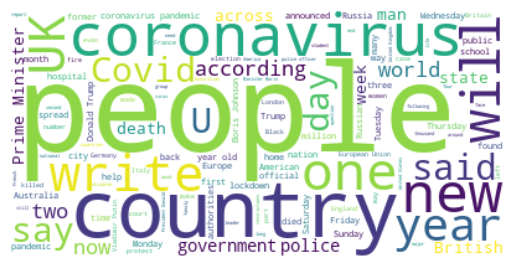

1    business
Name: unique_industry, dtype: object


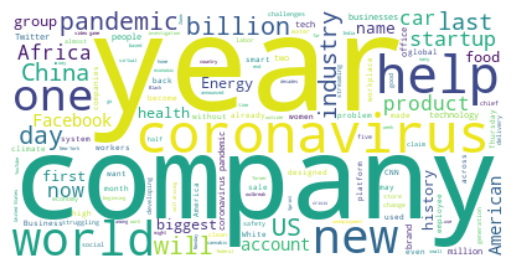

2    health
Name: unique_industry, dtype: object


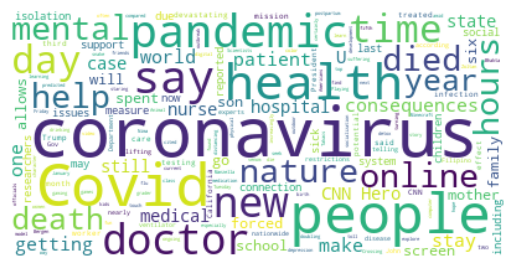

3    entertainment
Name: unique_industry, dtype: object


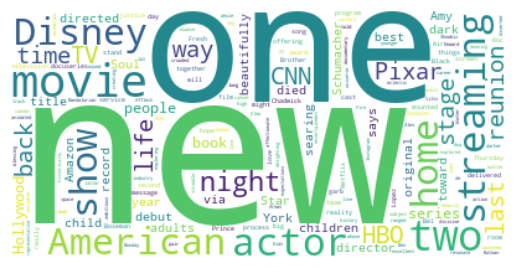

4    sport
Name: unique_industry, dtype: object


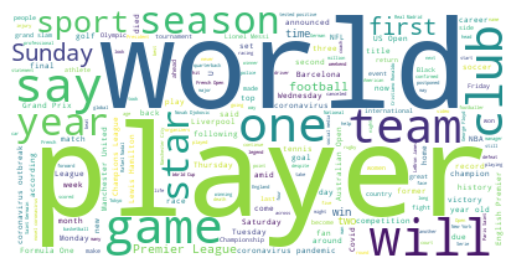

5    politics
Name: unique_industry, dtype: object


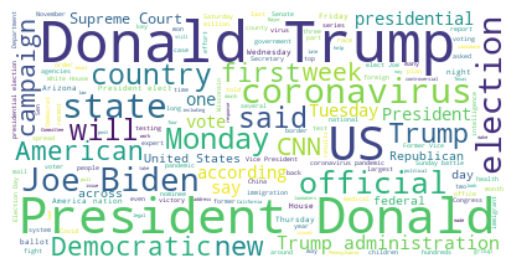

6    travel
Name: unique_industry, dtype: object


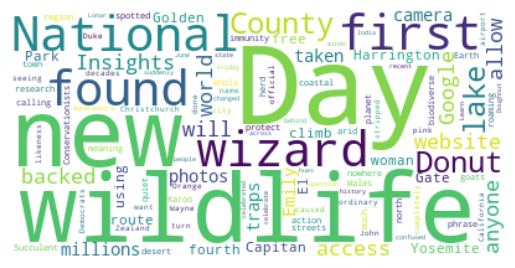

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [22]:
new_df['full_description'].apply(print_graph)

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
import tqdm

In [24]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [25]:
#df.iterrows() is index, row
res = {}
for i, row in tqdm.tqdm(articles.iterrows(), total=len(articles)):
    description = row['Description']

    myid = i + 1
    res[myid] = sia.polarity_scores(description)

100%|██████████| 37949/37949 [00:32<00:00, 1176.35it/s]


In [26]:
res

{1: {'neg': 0.223, 'neu': 0.619, 'pos': 0.157, 'compound': -0.128},
 2: {'neg': 0.109, 'neu': 0.817, 'pos': 0.074, 'compound': -0.0772},
 3: {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.7092},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.169, 'neu': 0.831, 'pos': 0.0, 'compound': -0.6249},
 6: {'neg': 0.223, 'neu': 0.568, 'pos': 0.208, 'compound': -0.1027},
 7: {'neg': 0.233, 'neu': 0.667, 'pos': 0.1, 'compound': -0.6808},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.6124},
 10: {'neg': 0.164, 'neu': 0.836, 'pos': 0.0, 'compound': -0.5994},
 11: {'neg': 0.104, 'neu': 0.767, 'pos': 0.129, 'compound': -0.0516},
 12: {'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.9787},
 13: {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.4404},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.087, 'neu': 0.836, 'pos': 0.077, 'compound': -0.0772},
 16: {'

In [27]:
s_df = pd.DataFrame(res).T
s_df

,neg,neu,pos,compound
1,0.223,0.619,0.157,-0.1280
2,0.109,0.817,0.074,-0.0772
3,0.000,0.777,0.223,0.7092
4,0.000,1.000,0.000,0.0000
5,0.169,0.831,0.000,-0.6249
...,...,...,...,...
37945,0.000,0.876,0.124,0.3400
37946,0.000,0.971,0.029,0.1280
37947,0.175,0.825,0.000,-0.6249
37948,0.000,1.000,0.000,0.0000


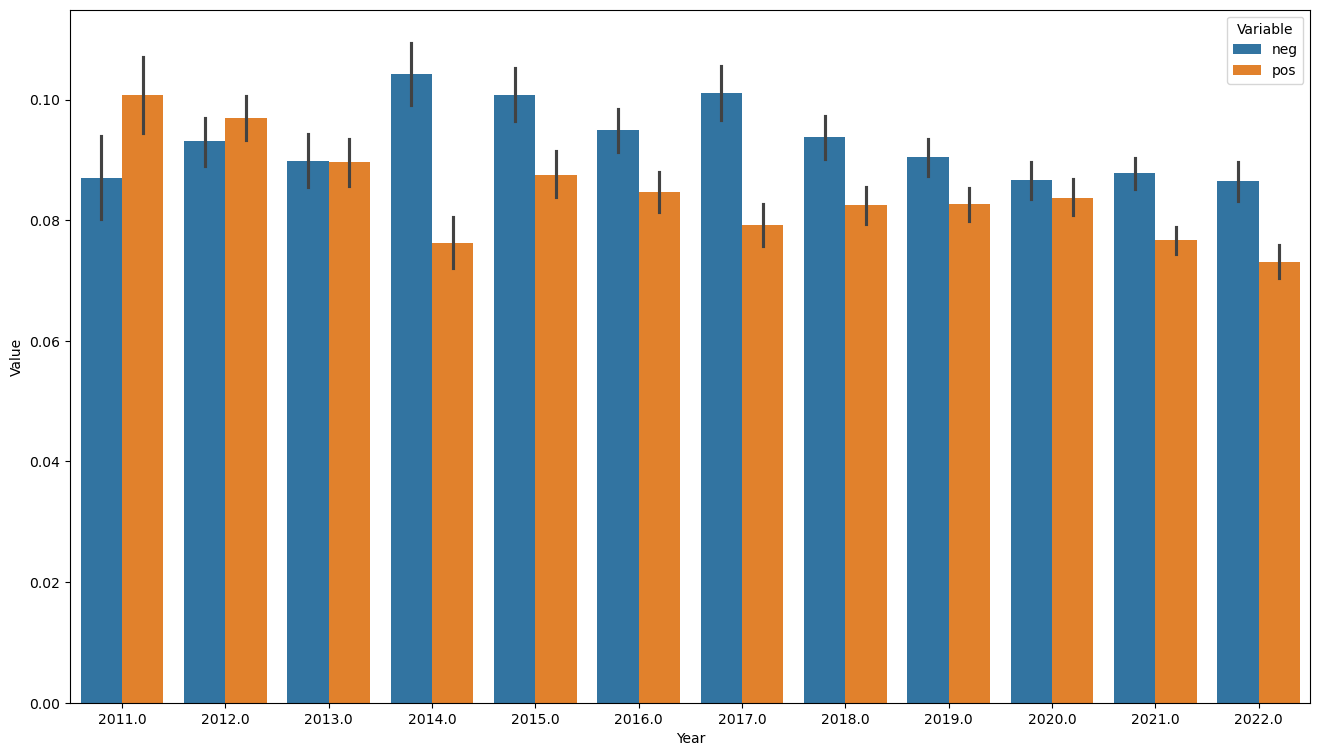

In [28]:
new_df = pd.concat([visualizations, s_df], axis=1)
new_df = new_df[['Year', 'neg', 'pos']]
tidy = new_df.melt(id_vars='Year').rename(columns=str.title)
plt.figure(figsize=(16, 9))

sns.barplot(x = 'Year',
            y = 'Value',
            hue = 'Variable',
            data = tidy)
plt.show()


In [29]:
articles[articles['Category']== 'sport']

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
64,64,"Ben Morse, CNN",2022-03-21 09:05:42,sport,sport,https://www.cnn.com/2022/03/21/sport/cleveland...,Cleveland Browns defend Deshaun Watson signing...,The Cleveland Browns have defended their signi...,"sport, Cleveland Browns defend Deshaun Watson ...",Cleveland Browns defend Deshaun Watson signing...,(CNN)The Cleveland Browns have defended their...
65,65,"Ben Church, CNN",2022-03-20 18:02:52,sport,motorsport,https://www.cnn.com/2022/03/20/motorsport/bahr...,Bahrain Grand Prix: Ferrari dominates as Charl...,Charles Leclerc won the Bahrain Grand Prix on ...,"motorsport, Bahrain Grand Prix: Ferrari domina...",Bahrain Grand Prix: Ferrari dominates as Charl...,(CNN)Charles Leclerc won the Bahrain Grand Pr...
66,66,"Ben Morse and Amanda Davies, CNN",2022-03-19 09:39:49,sport,sport,https://www.cnn.com/2022/03/19/sport/saudi-gol...,Greg Norman: Lucrative Saudi-backed golf leagu...,The new lucrative Saudi Arabia-backed golf lea...,"sport, Greg Norman: Lucrative Saudi-backed gol...",Lucrative Saudi-backed golf league is 'new opp...,(CNN)The new lucrative Saudi Arabia-backed go...
67,67,"Jacob Lev, CNN",2022-03-18 22:25:16,sport,sport,https://www.cnn.com/2022/03/18/sport/deshaun-w...,Deshaun Watson set to be traded from Houston T...,The Houston Texans have agreed to trade embatt...,"sport, Deshaun Watson set to be traded from Ho...",Cleveland Browns agree to trade for Texans' De...,(CNN)The Houston Texans have agreed to trade ...
69,69,"Steve Almasy, CNN",2022-03-18 23:00:31,sport,sport,https://www.cnn.com/2022/03/18/sport/lia-thoma...,Transgender swimmer Lia Thomas finishes 5th in...,University of Pennsylvania swimmer Lia Thomas ...,"sport, Transgender swimmer Lia Thomas finishes...",Transgender swimmer Lia Thomas finishes 5th in...,(CNN)University of Pennsylvania swimmer Lia T...
...,...,...,...,...,...,...,...,...,...,...,...
37939,44985,CNN Sport Staff,2022-03-02 09:28:48,sport,sport,https://www.cnn.com/2022/03/02/sport/tom-brady...,Tom Brady: Tampa Bay Buccaneers coach Bruce Ar...,Tampa Bay Buccaneers head coach Bruce Arians s...,"sport, Tom Brady: Tampa Bay Buccaneers coach B...",Tampa Bay Buccaneers coach Bruce Arians says '...,(CNN)Tampa Bay Buccaneers head coach Bruce Ar...
37940,44986,"Sammy Mngqosini and Aleks Klosok, CNN",2022-03-02 14:19:43,sport,football,https://www.cnn.com/2022/03/02/football/hansjo...,Chelsea: Swiss billionaire Hansjörg Wyss wants...,Swiss billionaire Hansjörg Wyss says he wants ...,"football, Chelsea: Swiss billionaire Hansjörg ...",Swiss billionaire Hansjörg Wyss wants to buy C...,(CNN)Swiss billionaire Hansjörg Wyss says he ...
37943,44991,"Ben Morse, CNN",2022-03-01 11:43:18,sport,sport,https://www.cnn.com/2022/03/01/sport/ja-morant...,"Ja Morant has historic night, breaks own scori...",What can't Ja Morant do?,"sport, Ja Morant has historic night, breaks ow...","Ja Morant has historic night, breaks own scori...","(CNN)What can't Ja Morant do?On Monday night,..."
37944,44992,"Ben Church and Aleks Klosok, CNN",2022-03-01 10:59:10,sport,sport,https://www.cnn.com/2022/03/01/sport/vladimir-...,Russian President Vladimir Putin is being stri...,Russian President Vladimir Putin has been stri...,"sport, Russian President Vladimir Putin is bei...",Vladimir Putin is being stripped of his honora...,(CNN)Russian President Vladimir Putin has bee...


In [30]:
articles[articles["Section"] == "opinions"]

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
118,118,Opinion by Moky Makura,2022-03-03 16:39:39,news,opinions,https://www.cnn.com/2022/03/03/opinions/racist...,Opinion: Media coverage of Ukraine shows it's ...,"As a Black, African woman without the benefit ...","opinions, Opinion: Media coverage of Ukraine s...",Media coverage of Ukraine shows it's time to r...,Moky Makura is the executive director of Afric...
193,194,"Opinion by Jeffrey Toobin, CNN",2022-03-14 10:10:44,news,opinions,https://www.cnn.com/2022/03/14/opinions/primar...,Opinion: Iowa and New Hampshire's preposterous...,Jeffrey Toobin writes that it's time for Iowa ...,"opinions, Opinion: Iowa and New Hampshire's pr...",Iowa and New Hampshire's preposterous reign ov...,Jeffrey Toobin is chief legal analyst for CNN ...
257,261,Opinion by Lauren Ghazal,2022-01-25 23:11:01,news,opinions,https://www.cnn.com/2022/01/25/opinions/nurse-...,Opinion: Our nursing workforce will keep crumb...,Ask any nurse in the United States -- there ar...,"opinions, Opinion: Our nursing workforce will ...",Our nursing workforce will keep crumbling if c...,"Lauren Ghazal, PhD, is a board-certified famil..."
258,262,Opinion by Kara Alaimo,2022-01-25 17:44:01,news,opinions,https://www.cnn.com/2022/01/25/opinions/parent...,Opinion: Parents' fury over school closures is...,With so many parents saying they're doing wors...,"opinions, Opinion: Parents' fury over school c...",What we're still not facing about parents' Cov...,"Kara Alaimo, an associate professor in the Law..."
259,263,Opinion by Jonathan Reiner,2022-01-23 00:36:10,news,opinions,https://www.cnn.com/2022/01/22/opinions/alcoho...,Opinion: If you think that glass of wine is go...,While there has been research to suggest a gla...,"opinions, Opinion: If you think that glass of ...",If you think that glass of wine is good for yo...,"Jonathan Reiner, MD, is a CNN medical analyst ..."
...,...,...,...,...,...,...,...,...,...,...,...
10465,17169,"Opinion by Julian Zelizer, CNN Political Analyst",2021-11-06 22:08:17,news,opinions,https://www.cnn.com/2021/11/06/opinions/biden-...,Opinion: Biden is on to something important - CNN,Our political standards have fallen so far tha...,"opinions, Opinion: Biden is on to something im...",Biden is on to something important,"Julian Zelizer, a CNN political analyst, is a ..."
10466,17170,"Opinion by Julian Zelizer, CNN Political Analyst",2021-10-28 20:42:40,news,opinions,https://www.cnn.com/2021/10/28/opinions/bill-c...,Opinion: When Bill and Hillary Clinton gambled...,"When Democrats controlled government in 1993, ...","opinions, Opinion: When Bill and Hillary Clint...",When Bill and Hillary Clinton gambled big,"Julian Zelizer, a CNN political analyst, is a ..."
10467,17171,"Opinion by Julian Zelizer, CNN Political Analyst",2021-10-22 19:32:16,news,opinions,https://www.cnn.com/2021/10/22/opinions/biden-...,Opinion: Biden's problem is bigger than two un...,Because the budget bill is so central to Biden...,"opinions, Opinion: Biden's problem is bigger t...",Biden's problem is bigger than two unruly sena...,"Julian Zelizer, a CNN political analyst, is a ..."
10468,17172,"Opinion by Julian Zelizer, CNN Political Analyst",2021-10-18 14:22:21,news,opinions,https://www.cnn.com/2021/10/18/opinions/colin-...,Opinion: Colin Powell was a soaring star until...,"As the nation mourns Colin Powell's passing, h...","opinions, Opinion: Colin Powell was a soaring ...",Colin Powell was a soaring star until he got t...,"Julian Zelizer, a CNN political analyst, is a ..."


In [31]:
articles[articles["Category"] == "politics"]

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
144,144,"Jennifer Hansler, CNN",2022-03-20 20:42:55,politics,politics,https://www.cnn.com/2022/03/20/politics/biden-...,Genocide in Myanmar: Biden administration form...,The Biden administration has formally determin...,"politics, Genocide in Myanmar: Biden administr...",Biden administration formally determines Myanm...,(CNN)The Biden administration has formally de...
155,155,"Analysis by Daniel Dale, CNN",2022-01-20 12:00:17,politics,politics,https://www.cnn.com/2022/01/20/politics/fact-c...,Fact check: A look at Biden's first year in fa...,When President Joe Biden passingly said in a v...,"politics, Fact check: A look at Biden's first ...",Fact check: A look at Biden's first year in fa...,Washington (CNN)When President Joe Biden passi...
156,156,"Daniel Dale and Marshall Cohen, CNN",2022-01-04 23:12:55,politics,politics,https://www.cnn.com/2022/01/04/politics/fact-c...,Fact check: 5 enduring lies about Capitol insu...,The Capitol insurrection was based on a lie ab...,"politics, Fact check: 5 enduring lies about Ca...",Fact check: Five enduring lies about the Capit...,Washington (CNN)The Capitol insurrection was b...
157,157,"Analysis by Daniel Dale, CNN",2021-03-03 01:33:41,politics,politics,https://www.cnn.com/2021/03/02/politics/fact-c...,Anatomy of a lie: How the myth that Antifa sto...,"Despite numerous debunkings, the lie that Anti...","politics, Anatomy of a lie: How the myth that ...",Anatomy of a lie: How the myth that Antifa sto...,Washington (CNN)FBI Director Christopher Wray ...
158,158,"Terence Burlij, Melissa Holzberg DePalo and Et...",2022-02-26 10:00:09,politics,politics,https://www.cnn.com/2022/02/26/politics/key-da...,Key dates for the 2022 midterm election - CNNP...,Voting ends in the first primaries for the 202...,"politics, Key dates for the 2022 midterm elect...",A roadmap to the 2022 midterm elections,(CNN)Voting ends in the first primaries for t...
...,...,...,...,...,...,...,...,...,...,...,...
10447,17148,"Jeff Zeleny, Kate Sullivan and Donald Judd, CNN",2022-02-01 18:23:38,politics,politics,https://www.cnn.com/2022/02/01/politics/biden-...,Biden set to pick his Supreme Court nominee's ...,President Joe Biden spent Tuesday afternoon st...,"politics, Biden set to pick his Supreme Court ...",Biden set to pick his Supreme Court nominee's ...,(CNN)President Joe Biden spent Tuesday aftern...
10448,17149,"Jeff Zeleny and Allie Malloy, CNN",2022-01-27 23:34:17,politics,politics,https://www.cnn.com/2022/01/27/politics/biden-...,'It's not just his fault': Biden voters look f...,Sally Bissey understands the pain facing many ...,"politics, 'It's not just his fault': Biden vot...",'It's not just his fault': Biden voters look f...,"Allentown, Pennsylvania (CNN)Sally Bissey und..."
10449,17150,"Kevin Liptak, Phil Mattingly, Jeff Zeleny and ...",2022-01-27 01:30:57,politics,politics,https://www.cnn.com/2022/01/26/politics/scotus...,Inside Biden's calculated response to Breyer's...,President Joe Biden received a much-needed pol...,"politics, Inside Biden's calculated response t...",Inside Biden's calculated response to Breyer's...,(CNN)President Joe Biden received a much-need...
10450,17152,"Betsy Klein, Jeff Zeleny and Kevin Liptak, CNN",2022-01-19 15:47:50,politics,politics,https://www.cnn.com/2022/01/19/politics/jane-h...,"Biden to nominate four additional ambassadors,...",President Joe Biden will announce his intent t...,"politics, Biden to nominate four additional am...","Biden to nominate four additional ambassadors,...",(CNN)President Joe Biden will announce his in...


In [32]:
!pip install transformers

In [49]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("d4data/bias-detection-model")
model = TFAutoModelForSequenceClassification.from_pretrained("d4data/bias-detection-model")

classifier = pipeline('text-classification', model=model, tokenizer=tokenizer) # cuda = 0,1 based on gpu availability
classifier("The irony, of course, is that the exhibit that invites people to throw trash at vacuuming Ivanka Trump lookalike reflects every stereotype feminists claim to stand against, oversexualizing Ivanka’s body and ignoring her hard work.")

ImportError: 
TFAutoModelForSequenceClassification requires the TensorFlow library but it was not found in your environment.
However, we were able to find a PyTorch installation. PyTorch classes do not begin
with "TF", but are otherwise identically named to our TF classes.
If you want to use PyTorch, please use those classes instead!

If you really do want to use TensorFlow, please follow the instructions on the
installation page https://www.tensorflow.org/install that match your environment.


In [47]:
articles["Description"].apply(classifier)

NameError: name 'classifier' is not defined

In [42]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\wayla\anaconda3\envs\pytorch_cuda\Lib\site-packages\packaging\requirements.py", line 36, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\wayla\anaconda3\envs\pytorch_cuda\Lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\wayla\anaconda3\envs\pytorch_cuda\Lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\wayla\anaconda3\envs\pytorch_cuda\Lib\site-package

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87973018-f03b-4fd7-9c2d-7536690ef4f7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>